# Final Project by Declan Baker
## Goal is to preform fits and analysis of fits

First we must import the class that was created to run all of this

In [113]:
import Final_class

# reload module if already loaded
import importlib
importlib.reload(Final_class)

<module 'Final_class' from '/home/dmb3jxy/Comp-Astro/final/Final_class.py'>

A little background on what the purpose and motivation of this project:
In my research under Bradley Johnson, I am working on a drone calibration device to find the orientation of the polarization of light in the optical spectrum. Ultimately, the polarization of the ambient background light will then be used to determine if gravitational waves can be detected.

The project itself is devised of two main instruments: the polarimeter and the drone calibration source. The polarimeter, in order of light hitting the instrument, consists of a rotating half wavelength plate, a linear polarizer, a lens, and a camera. Additionally, there is an encoded motor that rotates the half wavelength plate. As the half-wavelength plate is rotated it allows more or less light in. The half-wavelength plate is set for a specific frequency so it doesn't block all light just light at a specific frequency, here the frequency lines up with the color green.

The second part of the project is the calibration device, an LED of the same frequency as the half wavelength plate, mounted on a drone. The drone acts as a calibration source for the polarimeter that is at an “infinite” distance away from the polarimeter. Thus, the polarization of the source can then be used as a standard measuring tool against the ambient background light. Through using the orientation of the drone and the polarization of the background light, the possible effects of gravitational waves can be seen. 

Thus, the goal of the polarimeter is to map the green LED's intensity vs motor position. If done correctly it should come out as a sine wave. (There is one complication that the half-wavelength plate is birefringent so it will not just be one sine wave but two sine waves added together so that is why below we see 4 peaks instead of 2.) Once the sine wave is produced we will then use that to find the orientation of the polarization of the light by finding the phase of the sine wave.

The future goal for this project is upgrading both the drone to a CubeSat that will orbit the Earth and the polarimeter to a finer tuned polarimeter, possibly one at the Simon’s Observatory Telescope.

Now this project helps work on the analysis of the greeen LED's raw pixel value and motor angle. It will help find the correct sine wave model that fits the data and ultimately the phase we are looking for.

Now I have supplied two data sets 'output_25' and 'output26' that come from my research. 'output_25' is data collected through a paper diffuser so the data is a lot noiser. 'output_26' is taken normally, no diffuser, so it is a less noisy data set.

## output_25

First we will check out output_25 and make sure that the lengths of the data lineup with what we expect

In [114]:
fit = Final_class.Fitting("output_25")
print(fit.filename, len(fit.X), len(fit.Y))

output_25 250 250


This looks good! The data sizes that work with this pipeline work for arrays of length 250.
Now let us look at trying to fit this data using Curvefit methods we learned in class. This should output a plot and a model sine graph. In this we can add additional paratmeters close to what we think the variables should be

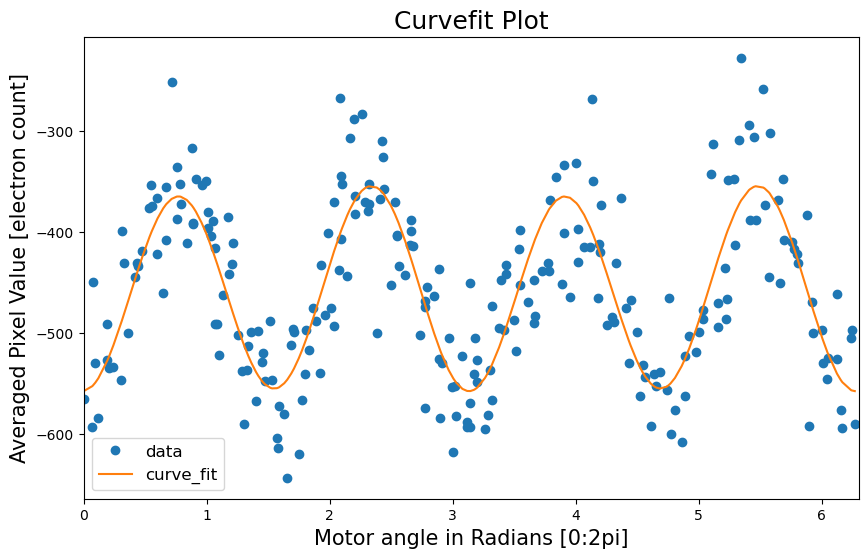

Curvefit:
original coefficients: -10.000, -1.000,  6.000, -100.000, -500.000
curve_fit coefficients: -5.134, -1.416,  5.827, -97.950, -458.024


(-5.134377915927628,
 -1.4155792821027562,
 5.826909374173733,
 -97.9499393507246,
 -458.02356033662466,
 array([-557.34757068, -552.53800585, -551.84639193, -549.0812005 ,
        -544.76080535, -527.09171362, -527.09171362, -522.31650487,
        -511.99146253, -489.90798686, -487.88068383, -482.75865107,
        -468.12453597, -445.98678538, -441.82743975, -438.73235289,
        -424.66823976, -405.29694886, -401.08721925, -399.45352848,
        -387.52219272, -386.84850251, -376.83145646, -373.11528344,
        -372.69801499, -367.50323214, -365.24985008, -365.14490141,
        -365.14197437, -365.31418503, -368.51305304, -373.93699923,
        -376.27690511, -376.27690511, -379.97897021, -390.90578147,
        -400.92038304, -405.10736755, -406.82966979, -413.96931613,
        -420.51268533, -425.33315797, -426.31040479, -432.25596996,
        -436.28900205, -448.63425944, -464.32230123, -468.50405833,
        -478.86924563, -480.9189089 , -493.95064848, -506.28703398,
        -51

In [115]:
fit = Final_class.Fitting("output_25", parameters=[-10, -1,  6, -100, -500])
fit.Curvefit()

The output above is the parameters along with each point in the model. This will be useful to compare the models late. It is more here if you are interested, but can gloss over for the most part.

Running burn-in...
Running production...


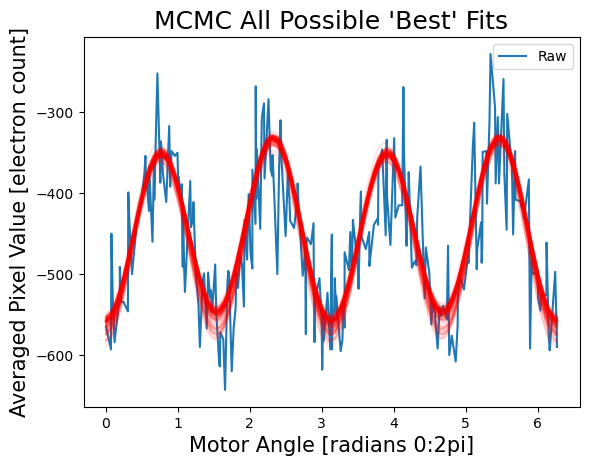

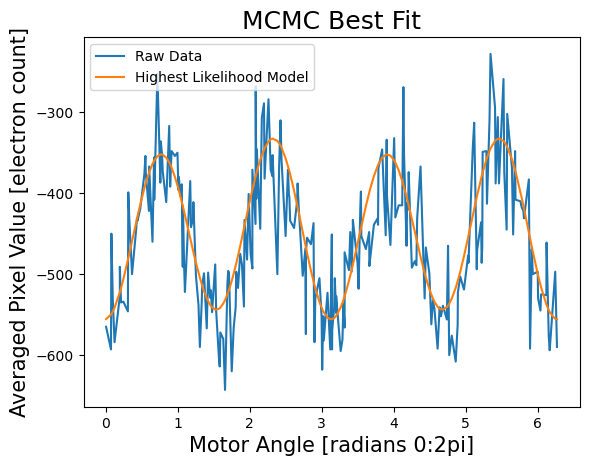

Theta max:  [  -9.49822532   -6.41011868    9.76150315 -103.16233908 -446.02473504]


(array([  -9.49822532,   -6.41011868,    9.76150315, -103.16233908,
        -446.02473504]),
 array([-555.53613892, -550.00137575, -549.23346436, -546.18205383,
        -541.45270801, -522.33053269, -522.33053269, -517.19697941,
        -506.12962414, -482.57323957, -480.41727731, -474.97460658,
        -459.45768131, -436.07370263, -431.69213676, -428.4342003 ,
        -413.65822029, -393.3914571 , -389.00274223, -387.30137135,
        -374.91196713, -374.21468058, -363.88932853, -360.08906432,
        -359.66402043, -354.42622448, -352.26673095, -352.18361113,
        -352.27345903, -352.49298804, -356.06302195, -361.89505472,
        -364.38726865, -364.38726865, -368.31383081, -379.82713488,
        -390.3125613 , -394.68193021, -396.47704008, -403.9055854 ,
        -410.69646049, -415.68922222, -416.70038127, -422.84499083,
        -427.00597552, -439.70738919, -455.76821619, -460.03331787,
        -470.57335352, -472.6518989 , -485.81793778, -498.18932638,
        -504.42915847, 

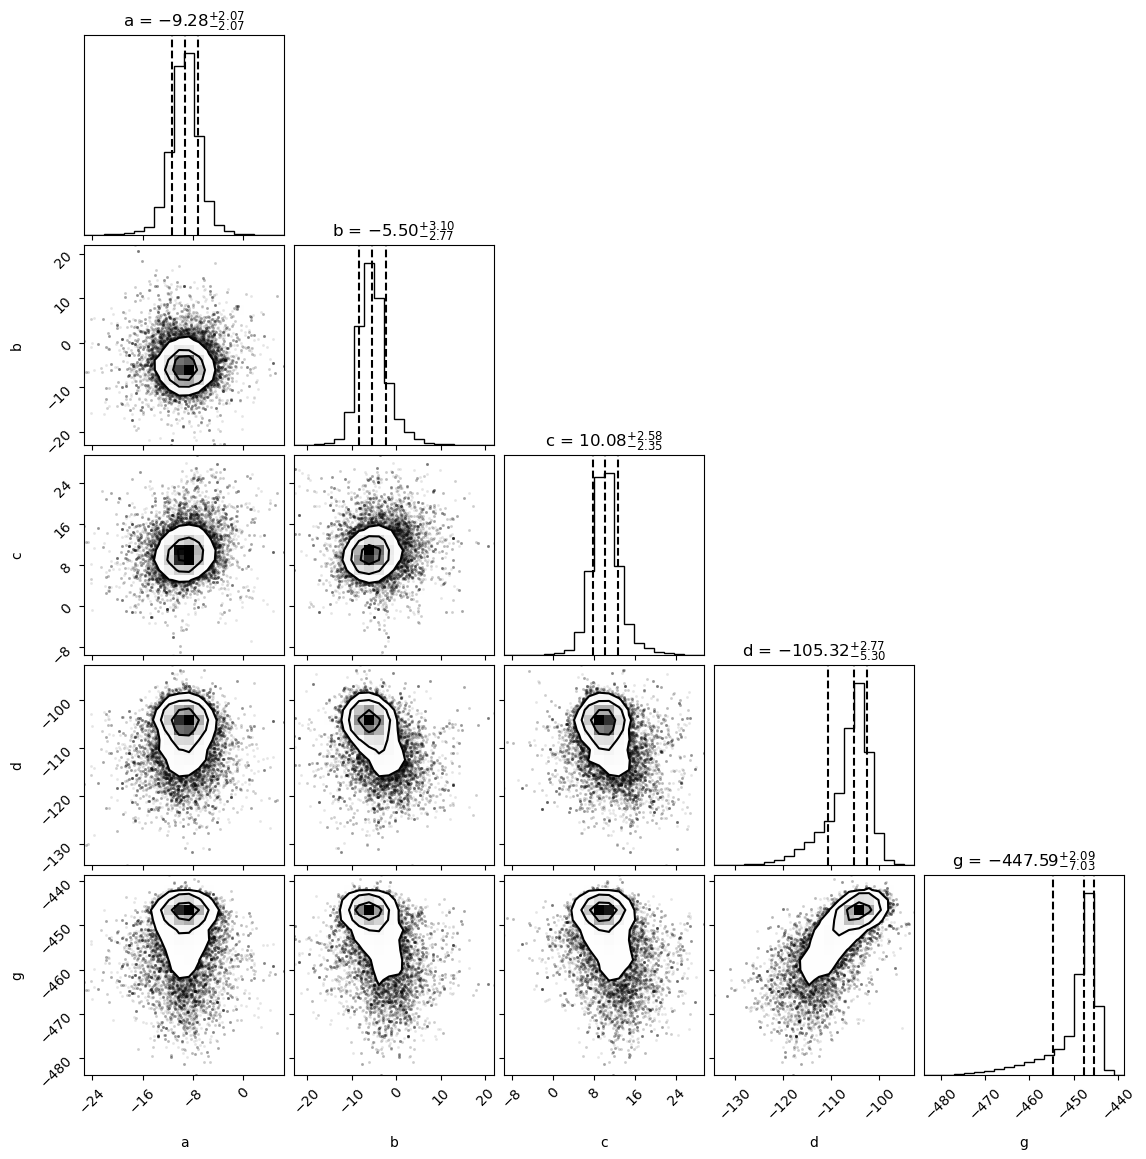

In [116]:
fit = Final_class.Fitting("output_25", parameters=[-10, -1,  6, -100, -500])
fit.MCMC()

Again the output above is the parameters along with each point in the model. This will be useful to compare the models late. It is more here if you are interested, but can gloss over for the most part.

Let us compare this now to another method of fitting: Markov Chain Monte Carlo, MCMC. This is a more rigorous implementation of fitting and honestly could be overkill for us in this situation, but yet still shows us some insight to this problem. 

MCMC shows us all possible answers and the likelihood of the parameters via corner plots. Corner plots plot one variable's likelihood versus another variable's likelihood. Then on the edge it shows the cross section distribution of the graphs. An ideal perfect variable would create a circle, darkest at the middle and slowly fading to white as the radius increases. Then the cross section distribution would be a Gaussian distribution. This plot can also help show if not enough iterations have been taken. While the variables are wandering and finding the perfect value they could easily get stuck in a local minimum not the global minimum. Thus the corner plot can help highlight this error or if there are two points that the variable is stuck between. Therefore, letting it run over more iterations would allow it to figure out the true minimum.

### PROS and CONS
Curevfit is better for small dimensional space problems. It is very fast and easy to implement. Meanwhile, MCMC is a lot better for high dimensional spaces because it uses it's walkers to move around the spaces and find the best fit looking at a lot of parameters at once. Saying this, MCMC takes a lot longer to run, has a lot of extra features, and takes a while to implement and even longer to understand the intricacies.

### ERROR BARS
An important feature of making a graph is finding the error on the data so we can then ultimately use that to find the error on the phase.

I calculated error bars using: \
upper envelop: $mean(a) + 1.96*stddev $ \
lower envelop: $mean(a) - 1.96*stddev $ \
1.96 is in accordance with 95% confidence

Now let's plot all of this together to see if they correlate or not

In [119]:
# just in case lets load/reload
import Final_class
import importlib
importlib.reload(Final_class)

<module 'Final_class' from '/home/dmb3jxy/Comp-Astro/final/Final_class.py'>

Running burn-in...
Running production...


<Figure size 1000x600 with 0 Axes>

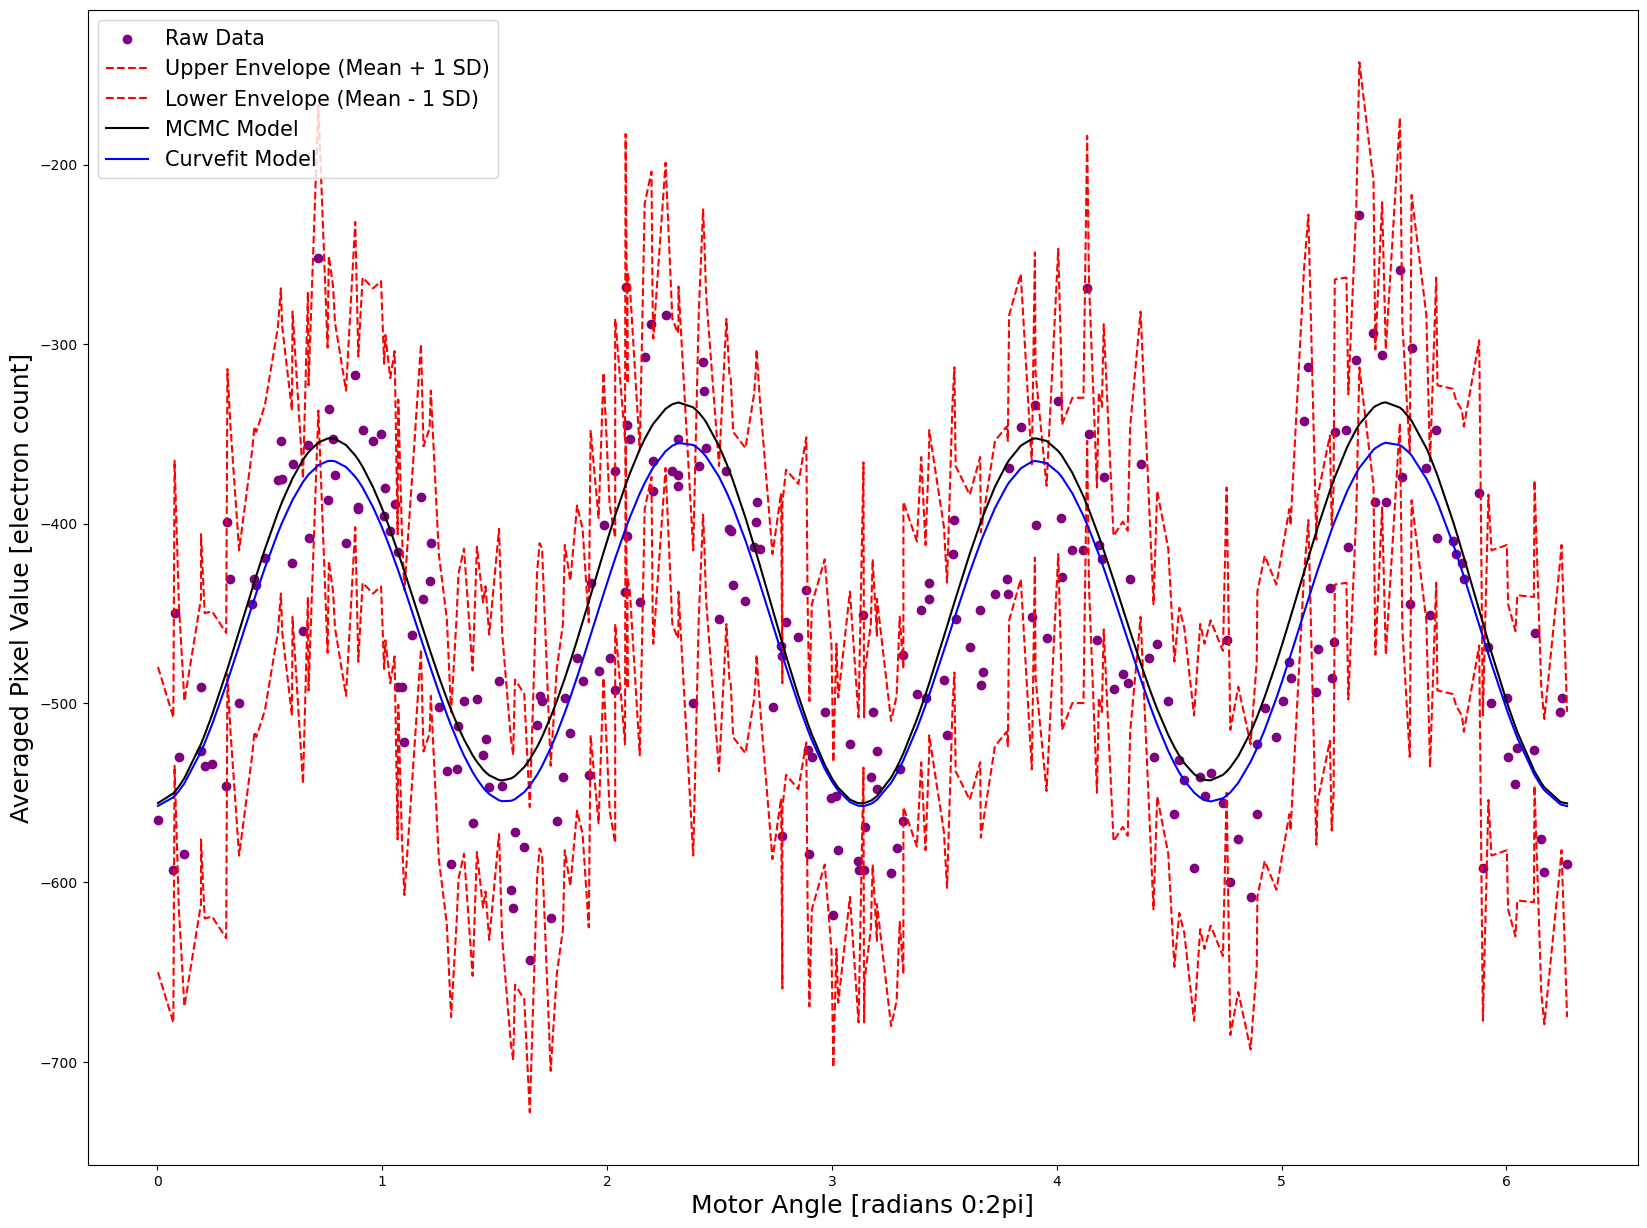

Curvefit phases:  3.4106151962116305 4.7718076013265325 MCMC phases:  3.7560982463644854 4.804709761224235
Curvefit phase:  4.091211398769081 +/- 0.6805962025574508
MCMC phase:  4.28040400379436 +/- 0.5243057574298748


In [120]:
fit = Final_class.Fitting("output_25", parameters=[-10, -1,  6, -100, -500])
fit.fancy_plot_and_phase()

### How was this Phase found?

Using this trig identity: $sin(\theta+\phi) = sin(\theta)cos(\phi) + cos(\theta)sin(\phi)$ 

Applied to our situation: 


$sin(2x+\phi) = sin(2x)cos(\phi) + cos(2x)sin(\phi)$

$sin(4x+\phi) = sin(4x)cos(\phi) + cos(4x)sin(\phi)$

Now here I let the model be $a*np.sin(2*x) + b*np.cos(2*x) + c*np.sin(4*x) + d*np.cos(4*x) + g
$ which means I let a != c and b != d. This was done on purpose to see if the fitting models could find similar parameters. However this leads to us having to be careful when turning the data back into the correct forms. Therefore trivially one could think the above trigonometry identity could be used. However instead one must use: 

$b*cos(2x) = b*sin(2x+\pi/2)$ and similarly $d*cos(4x) = d*sin(4x+\pi/2)$

Now we have: $a*sin(2x) + b*sin(2x+\pi/2) + c* sin(4x) + d*sin(4x+\pi/2)$

$asin(2x)+bsin(2x+\pi/2) = Rsin(2x+\phi)$, where here $R=sqrt(a^2+b^2)$ and $\phi=arctan(b/a)$

$csin(4x)+dsin(4x+\pi/2) = Qsin(4x+\psi)$, where here $Q=sqrt(c^2+d^2)$ and $\psi=arctan(d/c)$

If psi or phi is negative I added 2$\pi$ to them so that the math would be smoother and it won't affect the wave. Then from here I compared phi and psi. I took the average of them and then to find the error I did absolute value of the mean minus phi. This creates symmetric error bars and the distance from the value to the mean

### Phase: 
Curvefit phase:  4.091211398769081 +/- 0.6805962025574508 

MCMC phase:  4.28040400379436 +/- 0.5243057574298748

# output_26 
### Let's try this for the other data set we have

output_26 250 250


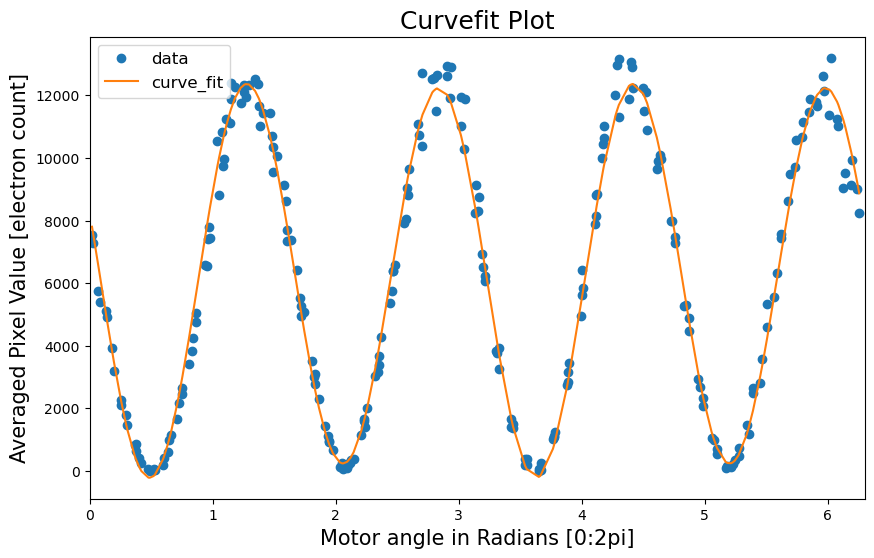

Curvefit:
original coefficients: -150.000, -200.000, -6000.000, 2000.000, 6000.000
curve_fit coefficients: -153.231, -182.004, -5706.282, 2278.774, 6153.187
Running burn-in...
Running production...


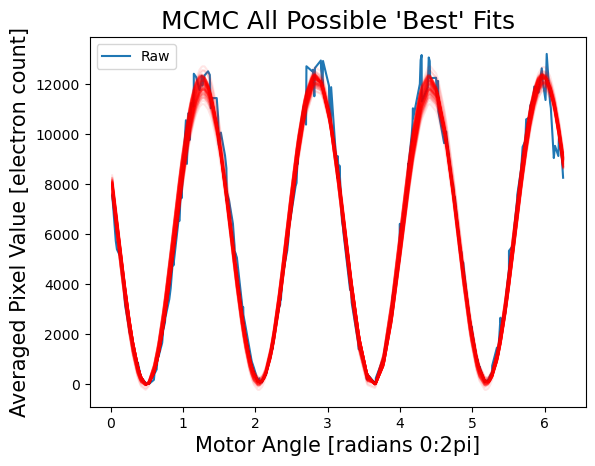

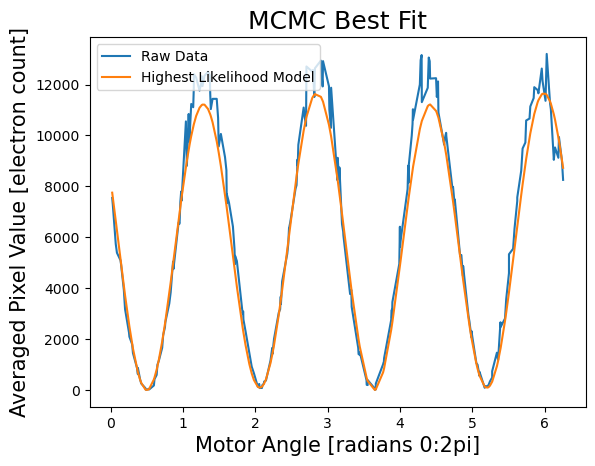

Theta max:  [ -159.11968456   157.42052554 -5227.32241365  2264.8991289
  5741.36074768]


(array([ -159.11968456,   157.42052554, -5227.32241365,  2264.8991289 ,
         5741.36074768]),
 array([7.75122359e+03, 7.57091676e+03, 6.64556271e+03, 6.26798432e+03,
        5.13059277e+03, 4.94246350e+03, 4.08021993e+03, 3.72193298e+03,
        2.60056448e+03, 2.49596050e+03, 1.81041679e+03, 1.63092549e+03,
        7.93385591e+02, 7.00415532e+02, 7.00415532e+02, 4.06631856e+02,
        2.78615451e+02, 1.77671411e+01, 1.83066797e+00, 1.42557241e+01,
        2.53637011e+01, 3.91826679e+01, 4.12475085e+02, 4.85290833e+02,
        7.99323832e+02, 9.31210667e+02, 1.18359906e+03, 1.90214851e+03,
        2.13924119e+03, 2.59183577e+03, 2.69656651e+03, 3.81230827e+03,
        4.22601376e+03, 4.46621919e+03, 4.95272292e+03, 5.07527626e+03,
        6.66991315e+03, 6.97058270e+03, 7.20819245e+03, 7.44270570e+03,
        7.55865988e+03, 8.76002405e+03, 9.00984219e+03, 9.43320281e+03,
        9.60962153e+03, 9.65253419e+03, 9.97787673e+03, 1.03369589e+04,
        1.04337728e+04, 1.04337728e+04

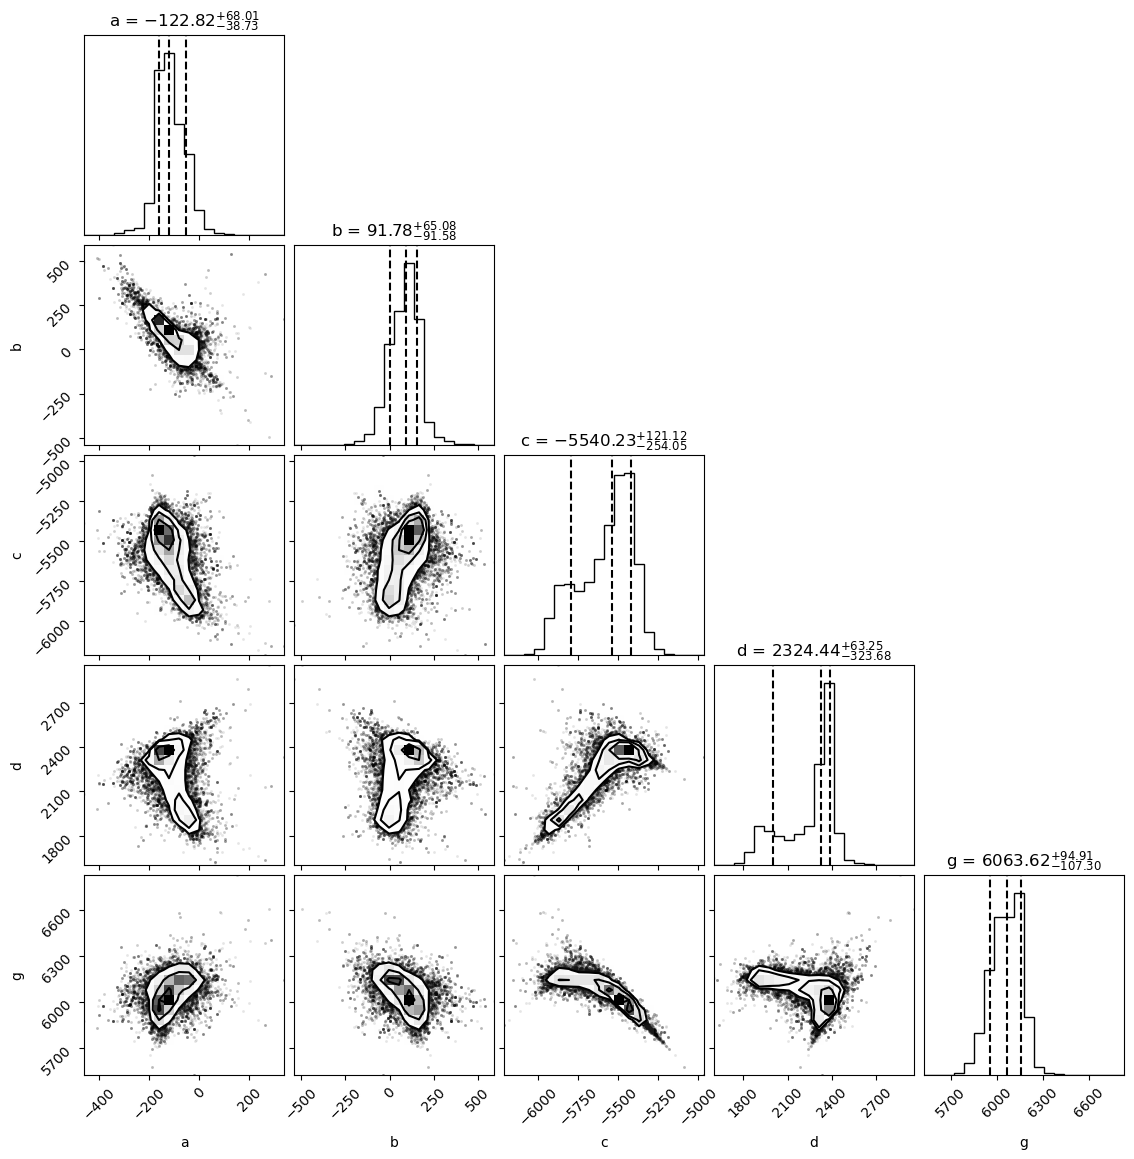

In [203]:
# just in case lets load/reload
import Final_class
import importlib
importlib.reload(Final_class)

# let's see the magic!
# here I have given parameters but feel free to change based on what you think is best
fit = Final_class.Fitting("output_26", parameters=[-150, -200,  -6000, 2000, 6000])
print(fit.filename, len(fit.X), len(fit.Y))
fit.Curvefit()
fit.MCMC()

Running burn-in...
Running production...


<Figure size 1000x600 with 0 Axes>

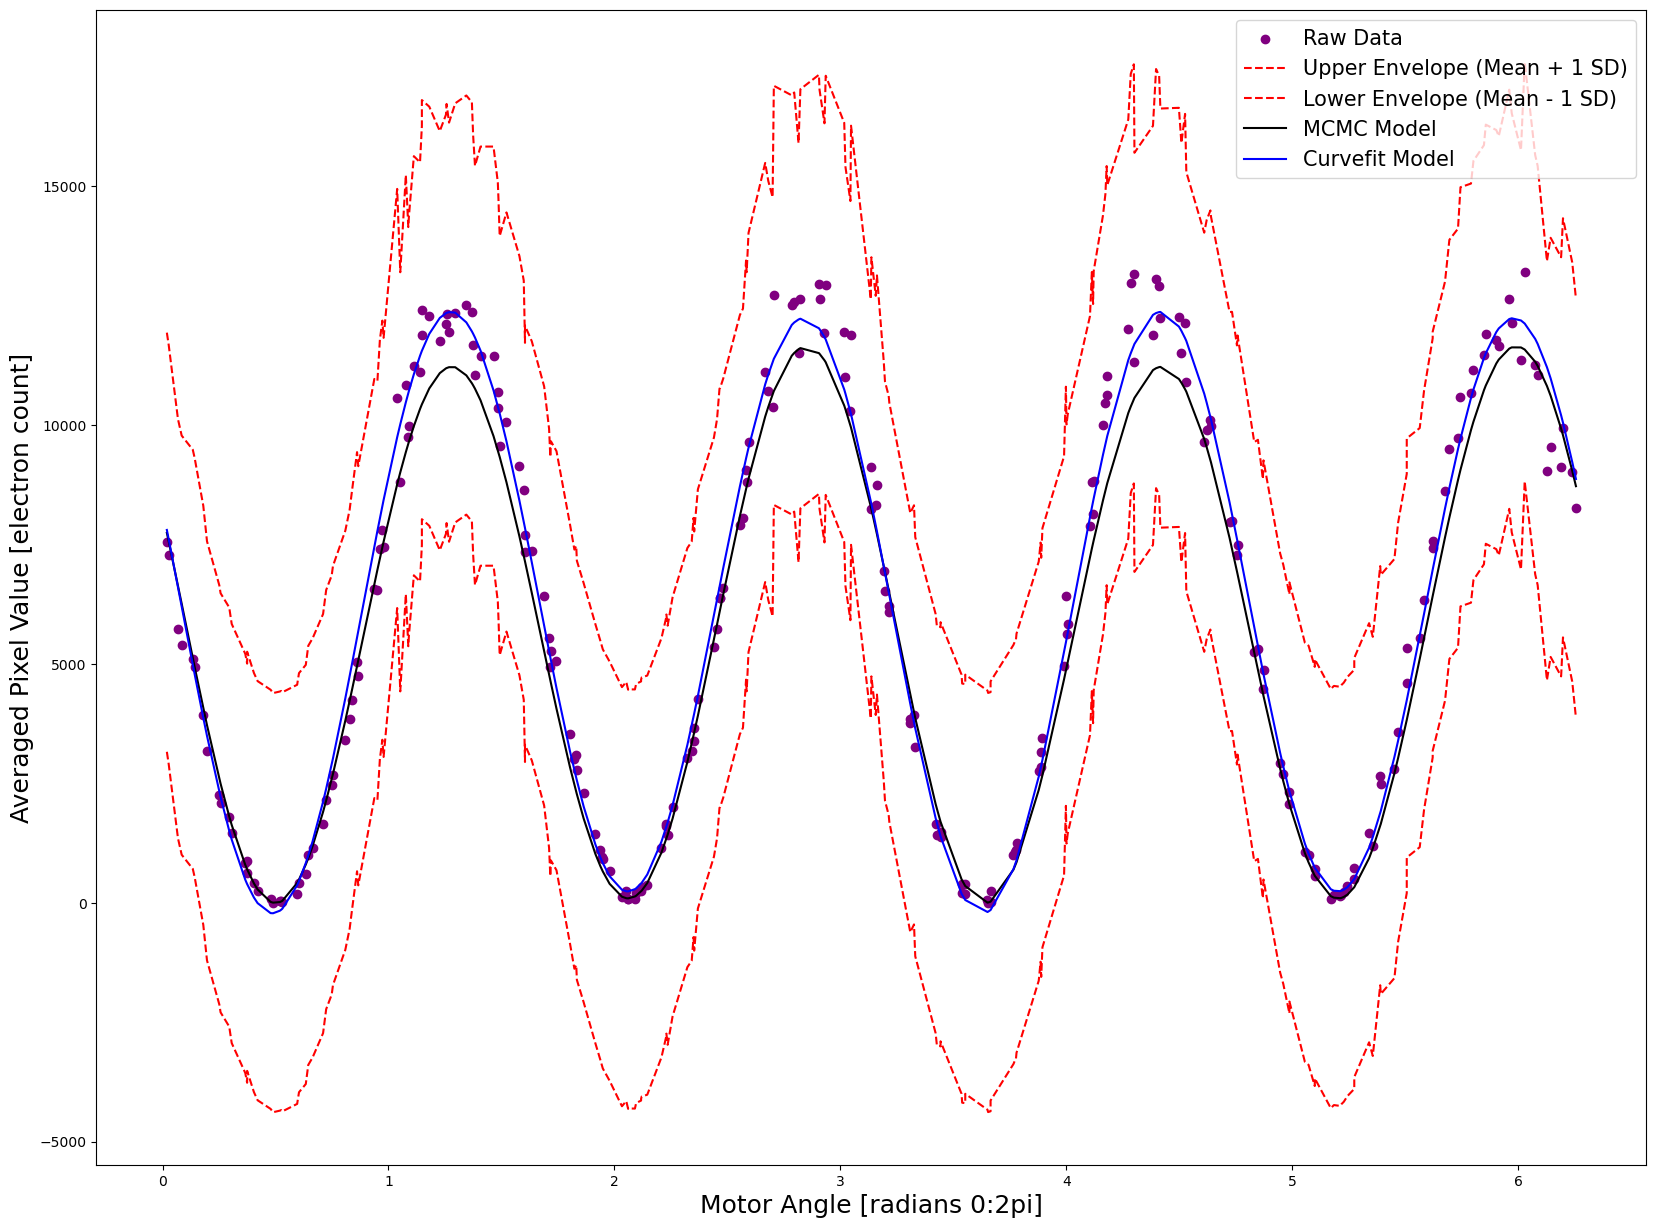

Curvefit phases:  4.012608567358782 2.761651184492378 MCMC phases:  2.3701137536175563 2.7324208521359465
Curvefit phase:  3.38712987592558 +/- 0.6254786914332024
MCMC phase:  2.5512673028767514 +/- 0.18115354925919513


In [198]:
fit = Final_class.Fitting("output_26", parameters=[-150, -200,  -6000, 2000, 6000])
fit.fancy_plot_and_phase()

### Phase: 
Curvefit phase:  3.38712987592558 +/- 0.6254786914332024

MCMC phase:  2.549369996077477 +/- 0.1831174360754355

## Testing!

This is awesome and everything, but how do we know that this is actually useful or accurate?
Built-in to the class there is a testing function, which allows the user to input a function with parameters. It will then generate fake data with noise based off of the input then fit to that data. We then can see how close to the original inputted parameters are to the MCMC or Curvefit generated parameters

Function model: a*sin(b*x+c)+d
Coefficients please follow this format: a, b, c, d


What coefficients do you want?:  1,1,1,1


Base function model options: sin(x), cos(x), x**2


What base function do you want?:  cos(x)


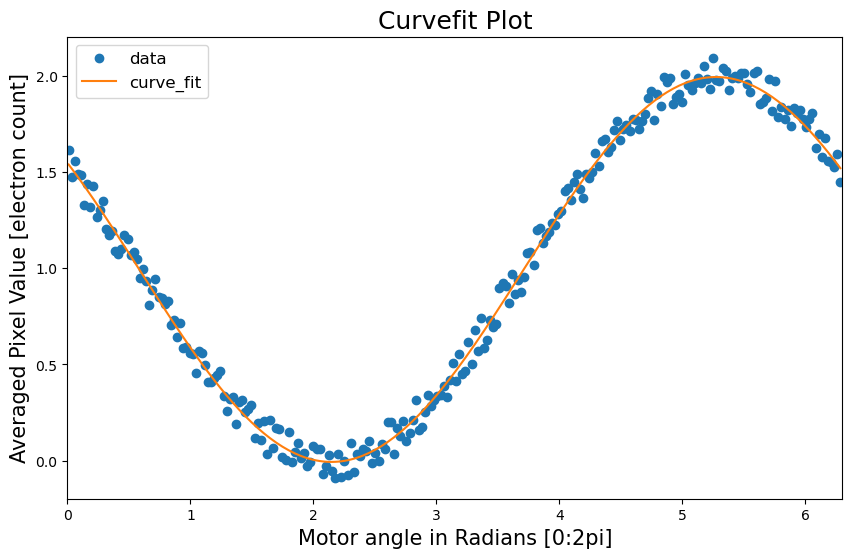

Curvefit:
original coefficients:  1.000,  1.000,  1.000,  1.000,  0.000
curve_fit coefficients:  1.001,  1.005,  0.984, 192.035, -191.040
Running burn-in...


/home/dmb3jxy/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Running production...


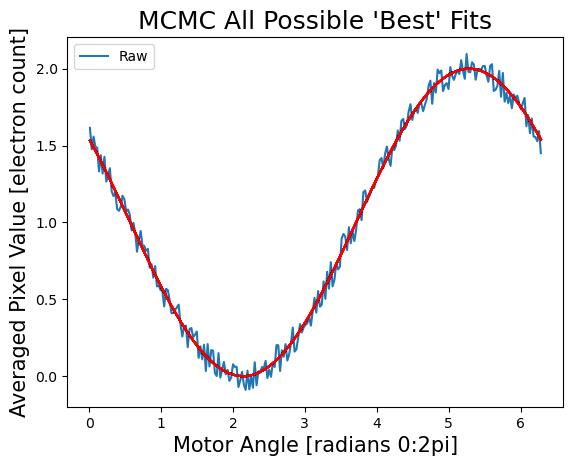

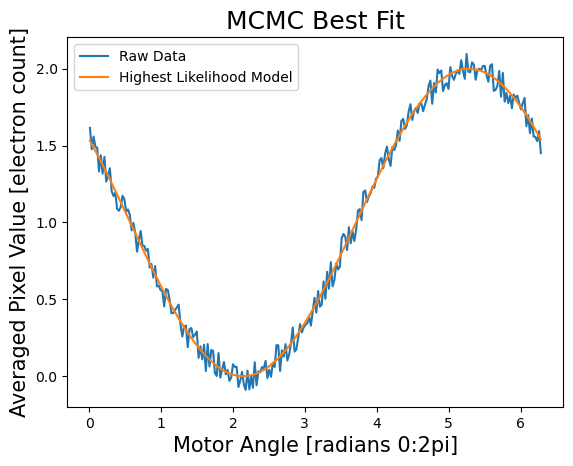

Theta max:  [ 1.00000013e+00  9.99999947e-01  9.99999924e-01  9.99999817e-01
 -6.54621467e-08]


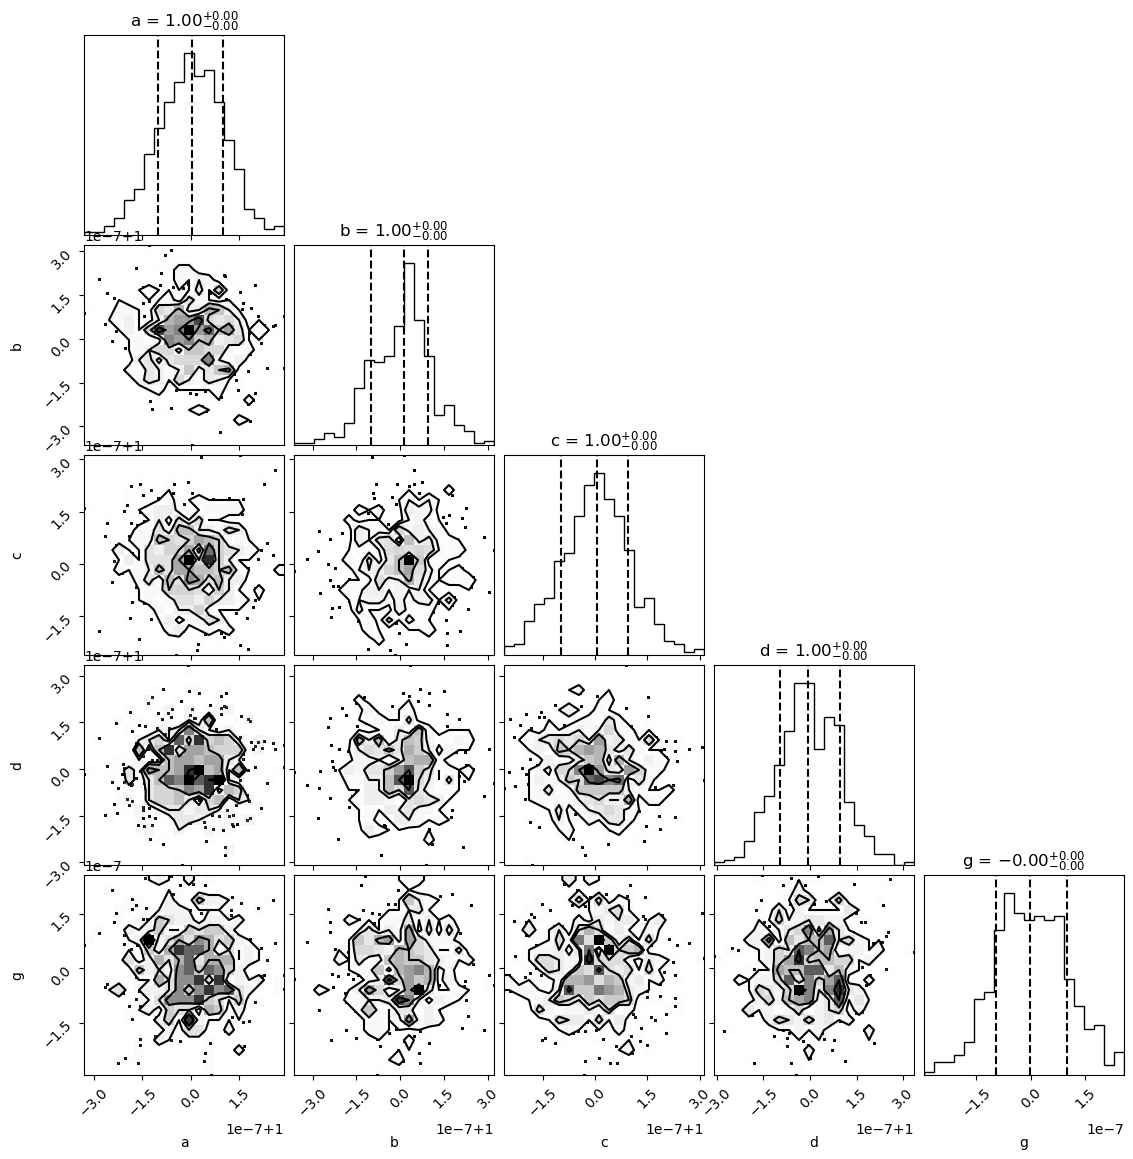

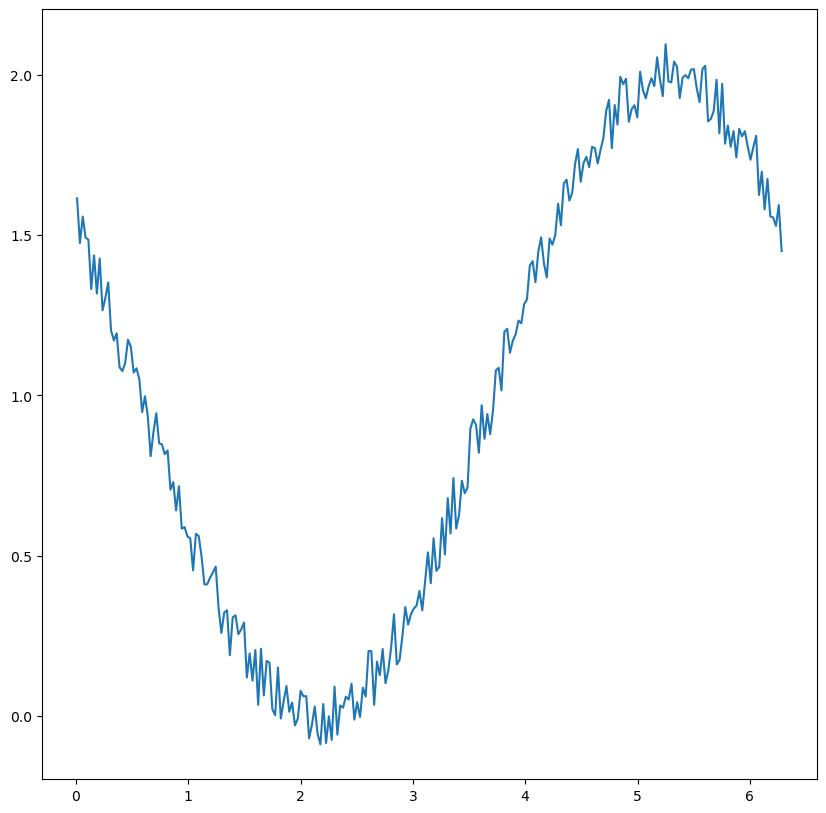

In [223]:
# just in case lets load/reload
import Final_class
import importlib
importlib.reload(Final_class)

func_map = {
    "sin(x)": np.sin,
    "cos(x)": np.cos,
    "x**2": lambda x: x**2
}
selected_function = func_map[base_func]


def testing():
    import numpy as np
    import matplotlib.pyplot as plt
    from numpy import sin
    from numpy import cos
    x = []
    # should do all the work for testing in one function

    def get_points_with_noise(coeff, z):
        a, b, c, d = coeff
        x = b*z +c
        x = np.array(x)
        noise = np.random.uniform(-.10, .10, size=num_points) # this should change based off of inputs
        print("Base function model options: sin(x), cos(x), x**2")
        base_func = input("What base function do you want?: ")    
        selected_function = func_map[base_func]  # Evaluate the user input from string to a useable function
        y = selected_function(x) + noise + d
        return z, y, base_func
        
    #Determining how many points we want; preset for 250 because that works with the data I already have
    num_points = 250
    # Generate points values
    z = np.linspace(0.01, 2*np.pi, num_points)
    z = np.array(z)
    
    # ask for the function
    print("Function model: a*sin(b*x+c)+d")
    print("Coefficients please follow this format: a, b, c, d")
    coeff = eval(input("What coefficients do you want?: "))
    
    x, y, base_func = get_points_with_noise(coeff, z)

    coeff = np.array(coeff)
    coeff = np.append(coeff, 0)
    coeff = tuple(coeff)
    
    x = list(x)
    y = list(y)
    fit = Final_class.Fitting(x, y, parameters=coeff)
    fit.Curvefit(model=base_func)
    fit.MCMC(model=base_func)
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    plt.show()
    return

### Teacher Completion
Here definitely try out all three graphs and see how Curvefit and MCMC compare. Are they good fitting models?

In [ ]:
testing()